In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from scipy import optimize

# Univariate Function Optimization

In [4]:
def cost(d,V):
    return np.pi*d*(90*(4*V)/(np.pi*d**2)+70*d/2)

In [5]:
d = np.linspace(1,7,100)
C = cost(d, 39)

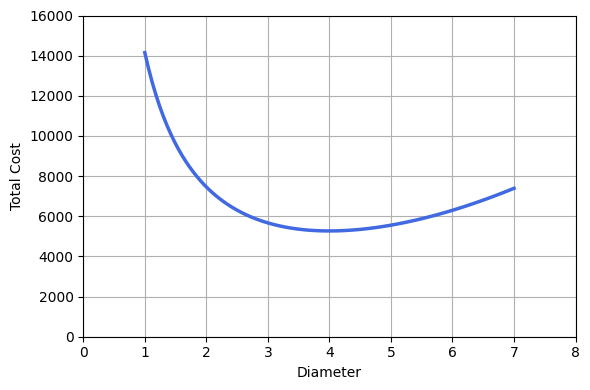

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(d, C, color='royalblue', linewidth=2.5, label='Cost Function')

# Add labels, title, grid
plt.xlabel("Diameter")
plt.ylabel("Total Cost")
plt.xlim((0, 8))
plt.ylim((0, 16000))

plt.tick_params(axis='both', which='major')

plt.grid(True)

plt.tight_layout()

# Show plot
plt.show()

- Golden Section Search:

In [7]:
optimize.golden(cost,args=(39,),brack=(1,7),full_output=True)

(np.float64(3.9967445971740285), np.float64(5269.288392126134), 44)

- Combination of Golden Section Search and Successive Parabolic Interpolation:

In [8]:
optimize.brent(cost,args=(39,),brack=(1,7),full_output=True)

(np.float64(3.9967446179544783), np.float64(5269.288392126134), 12, 15)

- Local minimization interface for scalar function of one variable:

In [9]:
optimize.minimize_scalar(cost,bracket=(1,7),args=(39,))

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 5269.288392126134
       x: 3.9967446179544783
     nit: 12
    nfev: 15

- Interface to minimization algorithms for scalar multivariate functions:

In [10]:
optimize.minimize(cost, (2,), args=(39,), bounds=((1,7),), method='trust-constr')

           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: 5269.288392126134
                 x: [ 3.997e+00]
               nit: 14
              nfev: 16
              njev: 8
              nhev: 0
          cg_niter: 7
      cg_stop_cond: 0
              grad: [ 0.000e+00]
   lagrangian_grad: [-3.788e-09]
            constr: [array([ 3.997e+00])]
               jac: [<Compressed Sparse Row sparse matrix of dtype 'float64'
                    	with 1 stored elements and shape (1, 1)>]
       constr_nfev: [0]
       constr_njev: [0]
       constr_nhev: [0]
                 v: [array([-3.788e-09])]
            method: tr_interior_point
        optimality: 3.7881168744204386e-09
  constr_violation: 0.0
    execution_time: 0.01841568946838379
         tr_radius: 59540.70612453532
    constr_penalty: 1.0
 barrier_parameter: 6.400000000000003e-06
 barrier_tolerance: 6.400000000000003e-06
             niter: 14

- Minimization of scalar function of one or more variables using the Newton-CG algorithm:

In [11]:
def cost_prime(d,V):
    return -360*V/d**2+70*np.pi*d

In [12]:
optimize.minimize(cost, (9,), jac=cost_prime, method='Newton-CG',args=(39,))

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 5269.288392126133
       x: [ 3.997e+00]
     nit: 7
     jac: [-1.408e-07]
    nfev: 9
    njev: 16
    nhev: 0

In [13]:
def cost_double_prime(d,V):
    return 720*V/d**3+70*np.pi

In [14]:
optimize.minimize(cost, (9,), jac=cost_prime, hess=cost_double_prime, method='Newton-CG',args=(39,))

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 5269.288392126134
       x: [ 3.997e+00]
     nit: 7
     jac: [-1.215e-07]
    nfev: 9
    njev: 9
    nhev: 7

# Multivariate Function Optimization

In [15]:
def objective(variables):
   x,y = variables
   return (x-y)**2+1/3*(x+y-10)**2

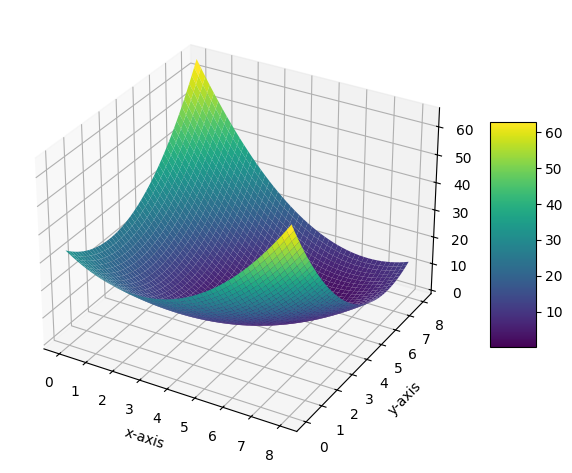

In [16]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0,8)
y = np.linspace(0,8)

X,Y = np.meshgrid(x,y)

surf = ax.plot_surface(X,Y,objective((X,Y)),cmap='viridis')

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()

In [17]:
S = optimize.minimize(objective,(0,0),method="Powell"); S

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.0
       x: [ 5.000e+00  5.000e+00]
     nit: 4
   direc: [[ 1.071e+00  1.607e+00]
           [ 1.984e-03 -4.960e-04]]
    nfev: 82